# Redes Neuronales

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.simplefilter("ignore")

Xt=np.load('datos_clase_9/Xt.npy')
Yt=np.load('datos_clase_9/Label.npy')

X_train, X_test, y_train, y_test = train_test_split(Xt, Yt, test_size=0.20)

Model = MLPClassifier(hidden_layer_sizes=(100,100,100,100),activation='relu',alpha=0.001, learning_rate='constant', learning_rate_init=0.0001,early_stopping=True,n_iter_no_change=200,max_iter=5000) #, max_iter=2000)
Model.fit(X_train, y_train) 
Yp=Model.predict(X_test)



In [20]:
Xt

array([[-0.02265508, -0.00718408,  0.0094499 ],
       [-0.03508023,  0.00853143,  0.01123966],
       [-0.02615378, -0.01706573,  0.01184528],
       ...,
       [-0.02521193,  0.00159715, -0.00121918],
       [ 0.11991788, -0.01691651,  0.01684186],
       [-0.00344383, -0.0385439 ,  0.00019332]])

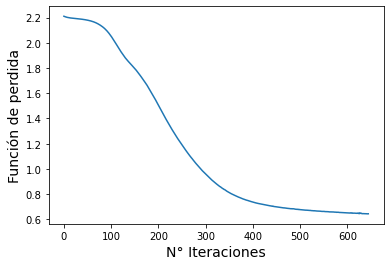

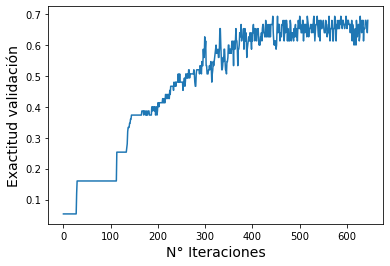

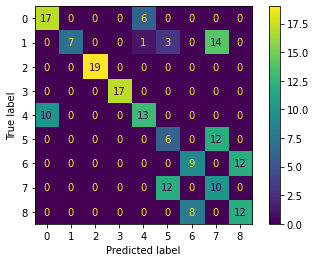

              precision    recall  f1-score   support

     Healthy       0.63      0.74      0.68        23
     Missing       1.00      0.28      0.44        25
       Crack       1.00      1.00      1.00        19
       Spall       1.00      1.00      1.00        17
      chip5a       0.65      0.57      0.60        23
      chip4a       0.29      0.33      0.31        18
      chip3a       0.53      0.43      0.47        21
      chip2a       0.28      0.45      0.34        22
      chip1a       0.50      0.60      0.55        20

    accuracy                           0.59       188
   macro avg       0.65      0.60      0.60       188
weighted avg       0.65      0.59      0.59       188



In [9]:
plt.plot(Model.loss_curve_)
plt.xlabel('N° Iteraciones', fontsize=14)
plt.ylabel('Función de perdida', fontsize=14)
plt.show()

plt.plot(Model.validation_scores_)
plt.xlabel('N° Iteraciones', fontsize=14)
plt.ylabel('Exactitud validación', fontsize=14)
plt.show()

plot_confusion_matrix(Model, X_test, y_test)
plt.show()

target_names = ['Healthy', 'Missing', 'Crack', 'Spall', 'chip5a', 'chip4a', 'chip3a', 'chip2a', 'chip1a']
print(classification_report(y_test, Yp, target_names=target_names))


**GridSearch**

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats


X_train, X_test, y_train, y_test = train_test_split(Xt, Yt, test_size=0.20)

Model= SVC(kernel='rbf')

#Grid Search
param_grid = {'C': [1, 10, 100, 1000, 10000, 100000], 'gamma': [0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4,12.8]}

grid_search = GridSearchCV(Model, param_grid=param_grid,cv=5)
grid_search.fit(X_train, y_train)
Resultados_GridSearch=grid_search.cv_results_;
print(max(Resultados_GridSearch['mean_test_score']))


0.8128322147651007


In [18]:
from scipy.stats import randint as sp_randint

Xt=np.load('datos_clase_9/Xt.npy')
Yt=np.load('datos_clase_9/Label.npy')
X_train, X_test, y_train, y_test = train_test_split(Xt, Yt, test_size=0.20)


parameter_space = {
    'hidden_layer_sizes': [(sp_randint.rvs(10,200,1),sp_randint.rvs(10,200,1),),
                                          (sp_randint.rvs(10,200,1),)],  #sp_randint.rvs(low, high, size)
    'activation': ['tanh', 'relu', 'logistic'],
    'alpha': stats.uniform(0.0001, 0.9), #L2 penalty
    'learning_rate_init': stats.uniform(0.00001, 0.001)}

Model = MLPClassifier(learning_rate='constant',early_stopping=True,n_iter_no_change=50,max_iter=1000)

random_search = RandomizedSearchCV(Model, param_distributions=parameter_space,n_iter=20, cv=5)
random_search.fit(X_train, y_train)
Resultados_RandomSearch=random_search.cv_results_;
print(max(Resultados_RandomSearch['mean_test_score']))


0.578765100671141
